In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train_paths, train_labels = create_dataframe(TRAIN_DIR)
train_df = pd.DataFrame({'image': train_paths, 'label': train_labels})
test_paths, test_labels = create_dataframe(TEST_DIR)
test_df = pd.DataFrame({'image': test_paths, 'label': test_labels})

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img_array = img_to_array(img)
        features.append(img_array)
    features = np.array(features)
    return features

In [6]:
x_train = extract_features(train_df['image']) / 255.0
x_test = extract_features(test_df['image']) / 255.0

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(train_df['label']))
y_test = to_categorical(label_encoder.transform(test_df['label']))

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [9]:
datagen.fit(x_train)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=int(len(x_train) / 128), epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 212ms/step - accuracy: 0.5895 - loss: 1.0895 - val_accuracy: 0.6050 - val_loss: 1.0568
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5391 - loss: 1.2199 - val_accuracy: 0.6057 - val_loss: 1.0496
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 220ms/step - accuracy: 0.5889 - loss: 1.0979 - val_accuracy: 0.6163 - val_loss: 1.0313
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5781 - loss: 1.1128 - val_accuracy: 0.6070 - val_loss: 1.0519
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 220ms/step - accuracy: 0.5896 - loss: 1.0809 - val_accuracy: 0.6302 - val_loss: 0.9899
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5312 - loss: 1.2702 - val_accuracy: 0.6312 - val_loss: 0.9852
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step - accuracy: 0.5926 - loss: 1.0827 - val_accuracy: 0.6237 - val_loss: 0.9977
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5234 - loss: 1

KeyboardInterrupt: 

In [16]:
model.save("emotion_detector_model3_rmsprop.h5")

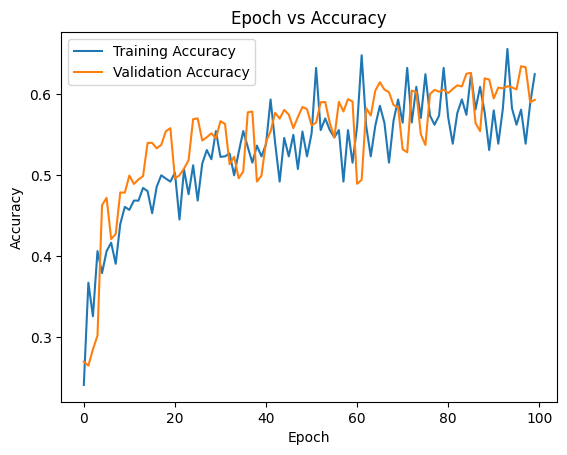

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()
